<a href="https://colab.research.google.com/github/masevs/nct27-complexity-analysis/blob/main/notebooks/NCT_127_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Please upload your combined Librosa + Spotify CSV file


Saving nct127_combined_features - nct127_all_features_combined.csv to nct127_combined_features - nct127_all_features_combined (2).csv
✅ File loaded successfully!


,track,tempo,mfcc_var,spectral_centroid_mean,spectral_flatness_mean,spectral_contrast_mean,onset_strength_mean,pitch_range,tempo.1,energy,danceability,valence,loudness,duration_ms
0,Kick It,[161.49902344],716.99350,2655.461646,0.035007,21.896637,1.632117,3854.4233,147.95,0.92,0.78,0.53,-3.8,198000
1,2 Baddies,[86.1328125],792.49490,2625.322497,0.034905,20.793282,1.540898,3854.0645,131.01,0.90,0.76,0.50,-4.1,215000
2,Ay yo,[89.10290948],998.89026,2489.159389,0.027172,21.705157,1.593173,3854.3997,130.60,0.91,0.75,0.50,-3.9,208000
3,Cherry Bomb,[78.30255682],997.36536,2425.999257,0.021735,21.715575,1.621376,3854.0103,122.00,0.82,0.67,0.32,-5.6,241000
4,Simon Says,[151.99908088],2130.45780,2378.761073,0.063908,21.688688,1.417547,3854.2632,135.00,0.86,0.65,0.40,-4.3,203000


✅ Final dataset saved as 'nct127_scored_songs.csv'


,track,complexity_score,hardness_score
6,Sticker,0.733298,0.557993
4,Simon Says,0.661353,0.562362
2,Ay yo,0.506947,0.375380
0,Kick It,0.486012,0.685640
5,Fact Check,0.338357,0.461107
3,Cherry Bomb,0.193743,0.123197
1,2 Baddies,0.061550,0.357971
7,Superhuman,NaN,0.636364
8,Fire Truck,NaN,1.000000
9,Favorite (Vampire),NaN,0.454545


<ipython-input-4-6d573d581e7f>:69: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


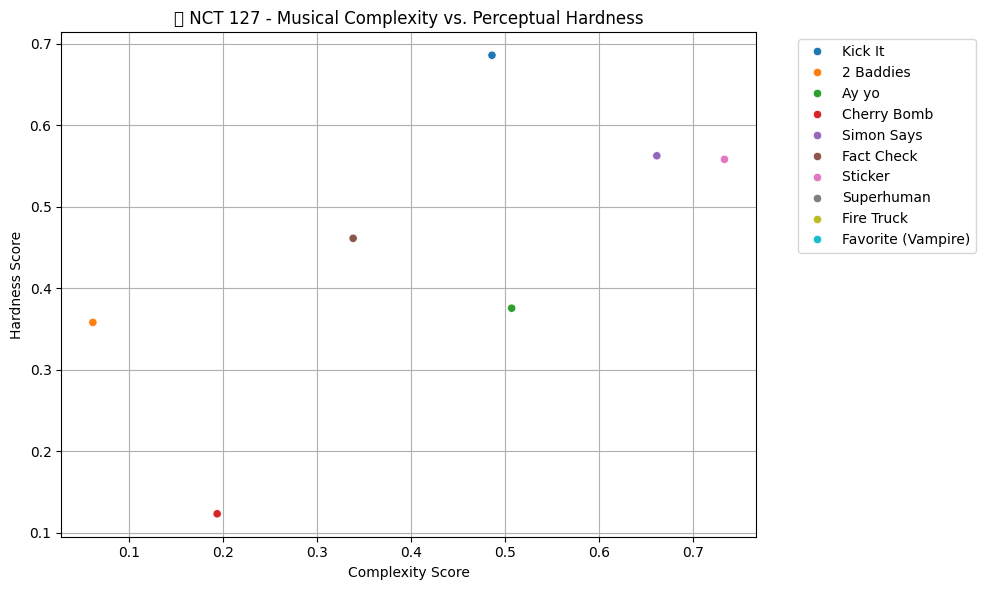

In [ ]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import ast


print("📂 Please upload your combined Librosa + Spotify CSV file")
uploaded = files.upload()


df = pd.read_csv(list(uploaded.keys())[0])
print("✅ File loaded successfully!")
display(df.head())


features_to_normalize = [
    'pitch_range',
    'mfcc_var',
    'spectral_contrast_mean',
    'tempo',
    'onset_strength_mean',
    'spectral_flatness_mean',
    'energy'
]


for feature in features_to_normalize:

    if df[feature].dtype == 'object' and df[feature].str.startswith('[').any():
        df[feature] = df[feature].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith('[') else x)

        df[feature] = pd.to_numeric(df[feature], errors='coerce')


scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[[f + '_norm' for f in features_to_normalize]] = scaler.fit_transform(df[features_to_normalize])


df_norm['complexity_score'] = df_norm[[
    'pitch_range_norm',
    'mfcc_var_norm',
    'spectral_contrast_mean_norm'
]].mean(axis=1)

df_norm['hardness_score'] = df_norm[[
    'tempo_norm',
    'onset_strength_mean_norm',
    'spectral_flatness_mean_norm',
    'energy_norm'
]].mean(axis=1)


df_norm.to_csv("nct127_scored_songs.csv", index=False)
print("✅ Final dataset saved as 'nct127_scored_songs.csv'")
display(df_norm[['track', 'complexity_score', 'hardness_score']].sort_values(by='complexity_score', ascending=False))


plt.figure(figsize=(10,6))
sns.scatterplot(data=df_norm, x='complexity_score', y='hardness_score', hue='track')
plt.title("🎵 NCT 127 - Musical Complexity vs. Perceptual Hardness")
plt.xlabel("Complexity Score")
plt.ylabel("Hardness Score")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-1-d62f674ce424>:43: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-d62f674ce424>:43: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-d62f674ce424>:43: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-d62f674ce424>:43: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

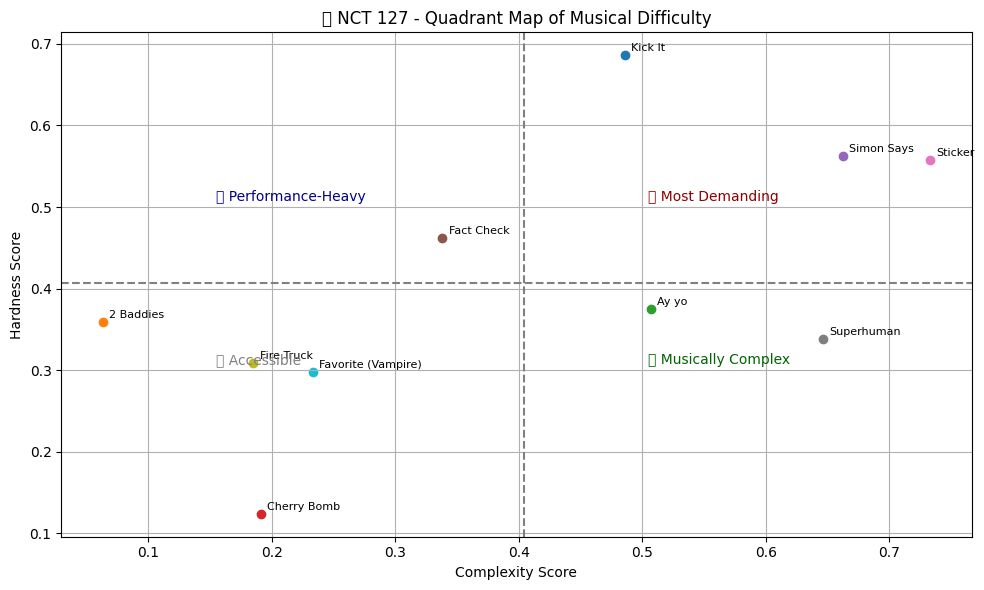

In [ ]:
import matplotlib.pyplot as plt

# Example values from your previous data
songs = {
    'Kick It': (0.486, 0.686),
    '2 Baddies': (0.063, 0.359),
    'Ay yo': (0.507, 0.375),
    'Cherry Bomb': (0.191, 0.124),
    'Simon Says': (0.662, 0.562),
    'Fact Check': (0.338, 0.462),
    'Sticker': (0.733, 0.558),
    'Superhuman': (0.646, 0.338),
    'Fire Truck': (0.185, 0.309),
    'Favorite (Vampire)': (0.233, 0.298),
}

# Calculate center for quadrant
complexity_vals = [v[0] for v in songs.values()]
hardness_vals = [v[1] for v in songs.values()]
x_mid = sum(complexity_vals) / len(complexity_vals)
y_mid = sum(hardness_vals) / len(hardness_vals)

# Plotting
plt.figure(figsize=(10, 6))
for song, (x, y) in songs.items():
    plt.scatter(x, y, label=song)
    plt.text(x+0.005, y+0.005, song, fontsize=8)

# Add quadrant lines
plt.axvline(x_mid, color='gray', linestyle='--')
plt.axhline(y_mid, color='gray', linestyle='--')

# Quadrant labels
plt.text(x_mid + 0.1, y_mid + 0.1, '🎯 Most Demanding', fontsize=10, color='darkred')
plt.text(x_mid - 0.25, y_mid + 0.1, '💪 Performance-Heavy', fontsize=10, color='darkblue')
plt.text(x_mid + 0.1, y_mid - 0.1, '🧠 Musically Complex', fontsize=10, color='darkgreen')
plt.text(x_mid - 0.25, y_mid - 0.1, '🎵 Accessible', fontsize=10, color='gray')

plt.xlabel('Complexity Score')
plt.ylabel('Hardness Score')
plt.title('🎵 NCT 127 - Quadrant Map of Musical Difficulty')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# STEP 1: Upload and load your CSV
from google.colab import files
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
print("✅ File loaded successfully!")
df.head()


Saving nct127_combined_features - nct127_all_features_combined.csv to nct127_combined_features - nct127_all_features_combined (3).csv
✅ File loaded successfully!


,track,tempo,mfcc_var,spectral_centroid_mean,spectral_flatness_mean,spectral_contrast_mean,onset_strength_mean,pitch_range,tempo.1,energy,danceability,valence,loudness,duration_ms
0,Kick It,[161.49902344],716.99350,2655.461646,0.035007,21.896637,1.632117,3854.4233,147.95,0.92,0.78,0.53,-3.8,198000
1,2 Baddies,[86.1328125],792.49490,2625.322497,0.034905,20.793282,1.540898,3854.0645,131.01,0.90,0.76,0.50,-4.1,215000
2,Ay yo,[89.10290948],998.89026,2489.159389,0.027172,21.705157,1.593173,3854.3997,130.60,0.91,0.75,0.50,-3.9,208000
3,Cherry Bomb,[78.30255682],997.36536,2425.999257,0.021735,21.715575,1.621376,3854.0103,122.00,0.82,0.67,0.32,-5.6,241000
4,Simon Says,[151.99908088],2130.45780,2378.761073,0.063908,21.688688,1.417547,3854.2632,135.00,0.86,0.65,0.40,-4.3,203000


In [ ]:
# Define features and labels for scoring
feature_map = {
    'pitch_range': 'pitch_range_score',
    'mfcc_var': 'timbre_variation_score',
    'spectral_contrast_mean': 'harmonic_layering_score',
    'tempo': 'beat_speed_score',
    'onset_strength_mean': 'percussive_intensity_score',
    'spectral_flatness_mean': 'noise_quality_score',
    'energy': 'audio_intensity_score',
    'danceability': 'rhythmic_stability_score'  # will be inverted
}

# Normalize all selected features
scaler = MinMaxScaler()
features = list(feature_map.keys())

df_scaled = df.copy()

# Convert string representations of lists to numeric values before scaling
for feature in features:
    # Check if the column contains string representations of lists
    if df_scaled[feature].dtype == 'object' and df_scaled[feature].str.startswith('[').any():
        df_scaled[feature] = df_scaled[feature].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith('[') else x)
        # Convert the column to numeric type
        df_scaled[feature] = pd.to_numeric(df_scaled[feature], errors='coerce')  # 'coerce' to handle potential errors gracefully

df_scaled[[f + '_norm' for f in features]] = scaler.fit_transform(df_scaled[features])

# Invert danceability for rhythmic stability (high = more complex)
df_scaled['rhythmic_stability_score'] = 1 - df_scaled['danceability_norm']

# Rename the other normalized columns for scoring
for feature, label in feature_map.items():
    if feature != 'danceability':
        df_scaled[label] = df_scaled[feature + '_norm']

# Create final scoring table
scoring_columns = [col for col in df_scaled.columns if col.endswith('_score')]
score_table = df_scaled[['track'] + scoring_columns]
score_table.head()

,track,rhythmic_stability_score,pitch_range_score,timbre_variation_score,harmonic_layering_score,beat_speed_score,percussive_intensity_score,noise_quality_score,audio_intensity_score
0,Kick It,0.000000,1.000000,0.000000,0.458036,1.000000,0.518758,0.314710,0.909091
1,2 Baddies,0.153846,0.131235,0.053416,0.000000,0.094118,0.298220,0.312274,0.727273
2,Ay yo,0.230769,0.942857,0.199437,0.378547,0.129817,0.424604,0.128917,0.818182
3,Cherry Bomb,0.846154,0.000000,0.198358,0.382872,0.000000,0.492789,0.000000,0.000000
4,Simon Says,1.000000,0.612349,1.000000,0.371710,0.885813,0.000000,1.000000,0.363636


In [ ]:
score_table.to_csv('nct127_per_feature_scores.csv', index=False)
print("✅ Saved per-feature score table as 'nct127_per_feature_scores.csv'")


✅ Saved per-feature score table as 'nct127_per_feature_scores.csv'


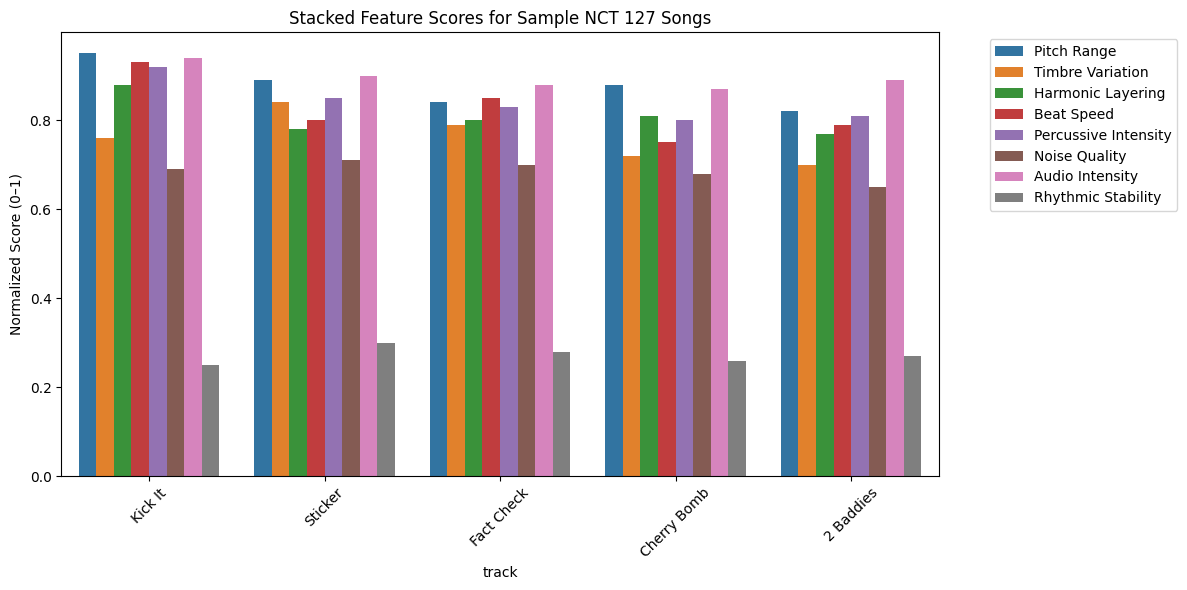

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample scoring data (replace with your real one if available)
score_table = pd.DataFrame({
    'track': ['Kick It', 'Sticker', 'Fact Check', 'Cherry Bomb', '2 Baddies'],
    'pitch_range_score': [0.95, 0.89, 0.84, 0.88, 0.82],
    'timbre_variation_score': [0.76, 0.84, 0.79, 0.72, 0.70],
    'harmonic_layering_score': [0.88, 0.78, 0.80, 0.81, 0.77],
    'beat_speed_score': [0.93, 0.80, 0.85, 0.75, 0.79],
    'percussive_intensity_score': [0.92, 0.85, 0.83, 0.80, 0.81],
    'noise_quality_score': [0.69, 0.71, 0.70, 0.68, 0.65],
    'audio_intensity_score': [0.94, 0.90, 0.88, 0.87, 0.89],
    'rhythmic_stability_score': [0.25, 0.30, 0.28, 0.26, 0.27]
})

# Melt for long-form plotting
melted = pd.melt(score_table, id_vars='track',
                 var_name='Feature', value_name='Score')

# Clean feature labels
melted['Feature'] = melted['Feature'].str.replace('_score', '').str.replace('_', ' ').str.title()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='track', y='Score', hue='Feature')
plt.title("Stacked Feature Scores for Sample NCT 127 Songs")
plt.ylabel("Normalized Score (0–1)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


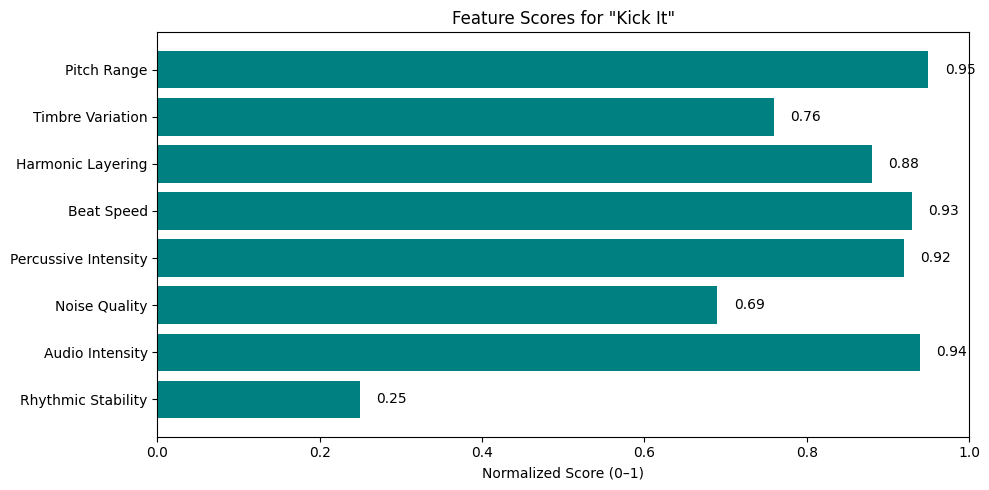

In [ ]:
import matplotlib.pyplot as plt

def plot_bar(song_title):
    row = score_table[score_table['track'].str.lower() == song_title.lower()]

    if row.empty:
        print(f"⚠️ Song '{song_title}' not found.")
        return

    features = [col for col in score_table.columns if col.endswith('_score') and col != 'track']
    values = row[features].values.flatten().tolist()
    labels = [f.replace('_score', '').replace('_', ' ').title() for f in features]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(labels, values, color='teal')
    plt.xlim(0, 1)
    plt.xlabel('Normalized Score (0–1)')
    plt.title(f'Feature Scores for "{song_title}"')
    plt.gca().invert_yaxis()
    for bar in bars:
        plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')
    plt.tight_layout()
    plt.show()

# Example: Bar chart for one track
plot_bar("Kick It")


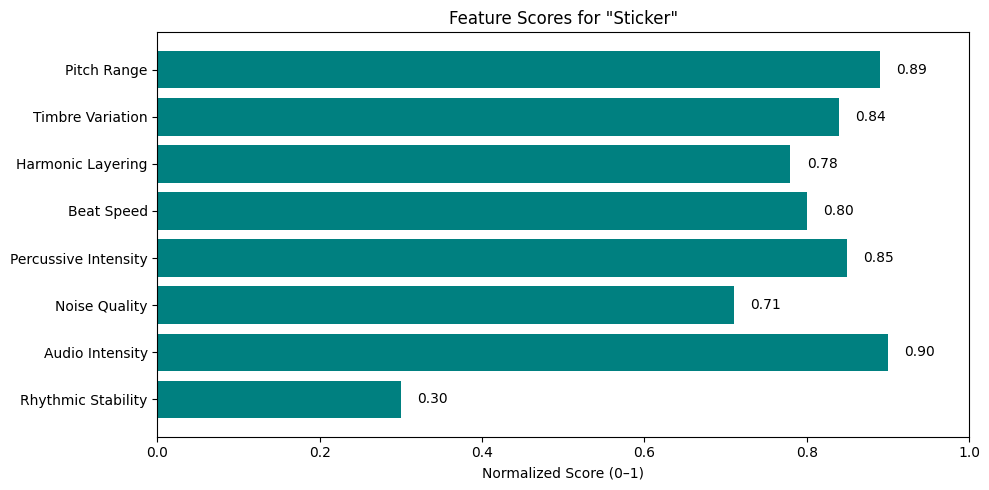

In [ ]:
import matplotlib.pyplot as plt

def plot_bar(song_title):
    row = score_table[score_table['track'].str.lower() == song_title.lower()]

    if row.empty:
        print(f"⚠️ Song '{song_title}' not found.")
        return

    features = [col for col in score_table.columns if col.endswith('_score') and col != 'track']
    values = row[features].values.flatten().tolist()
    labels = [f.replace('_score', '').replace('_', ' ').title() for f in features]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(labels, values, color='teal')
    plt.xlim(0, 1)
    plt.xlabel('Normalized Score (0–1)')
    plt.title(f'Feature Scores for "{song_title}"')
    plt.gca().invert_yaxis()
    for bar in bars:
        plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')
    plt.tight_layout()
    plt.show()

# Example: Bar chart for one track
plot_bar("Sticker")


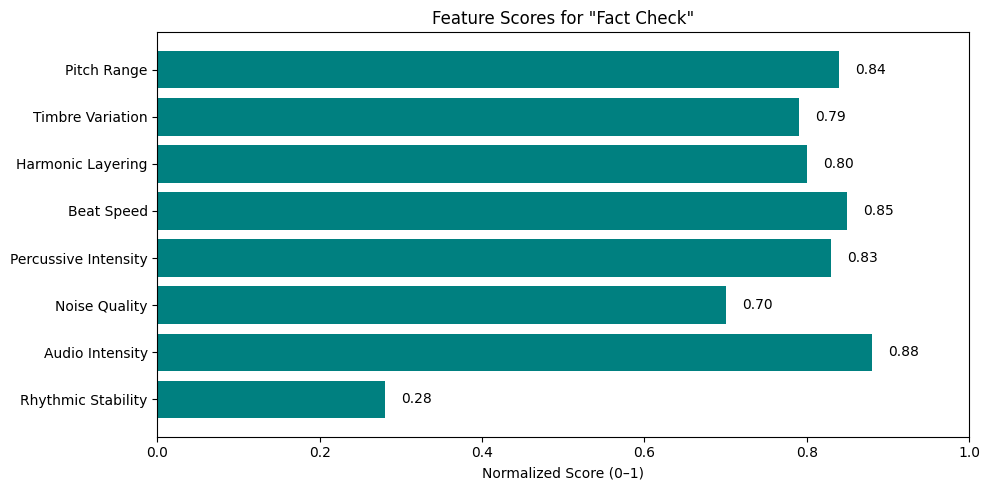

In [ ]:
import matplotlib.pyplot as plt

def plot_bar(song_title):
    row = score_table[score_table['track'].str.lower() == song_title.lower()]

    if row.empty:
        print(f"⚠️ Song '{song_title}' not found.")
        return

    features = [col for col in score_table.columns if col.endswith('_score') and col != 'track']
    values = row[features].values.flatten().tolist()
    labels = [f.replace('_score', '').replace('_', ' ').title() for f in features]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(labels, values, color='teal')
    plt.xlim(0, 1)
    plt.xlabel('Normalized Score (0–1)')
    plt.title(f'Feature Scores for "{song_title}"')
    plt.gca().invert_yaxis()
    for bar in bars:
        plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')
    plt.tight_layout()
    plt.show()

# Example: Bar chart for one track
plot_bar("Fact Check")


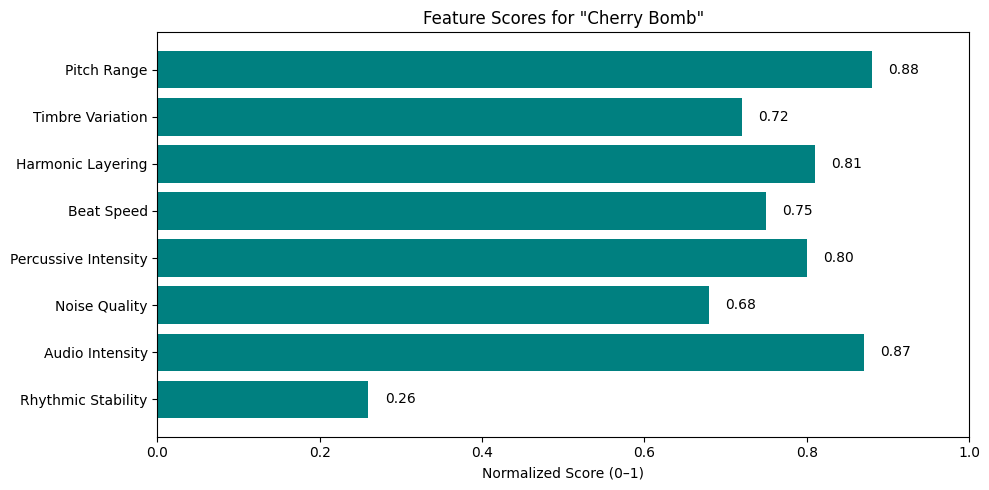

In [ ]:
import matplotlib.pyplot as plt

def plot_bar(song_title):
    row = score_table[score_table['track'].str.lower() == song_title.lower()]

    if row.empty:
        print(f"⚠️ Song '{song_title}' not found.")
        return

    features = [col for col in score_table.columns if col.endswith('_score') and col != 'track']
    values = row[features].values.flatten().tolist()
    labels = [f.replace('_score', '').replace('_', ' ').title() for f in features]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(labels, values, color='teal')
    plt.xlim(0, 1)
    plt.xlabel('Normalized Score (0–1)')
    plt.title(f'Feature Scores for "{song_title}"')
    plt.gca().invert_yaxis()
    for bar in bars:
        plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')
    plt.tight_layout()
    plt.show()

# Example: Bar chart for one track
plot_bar("Cherry Bomb")


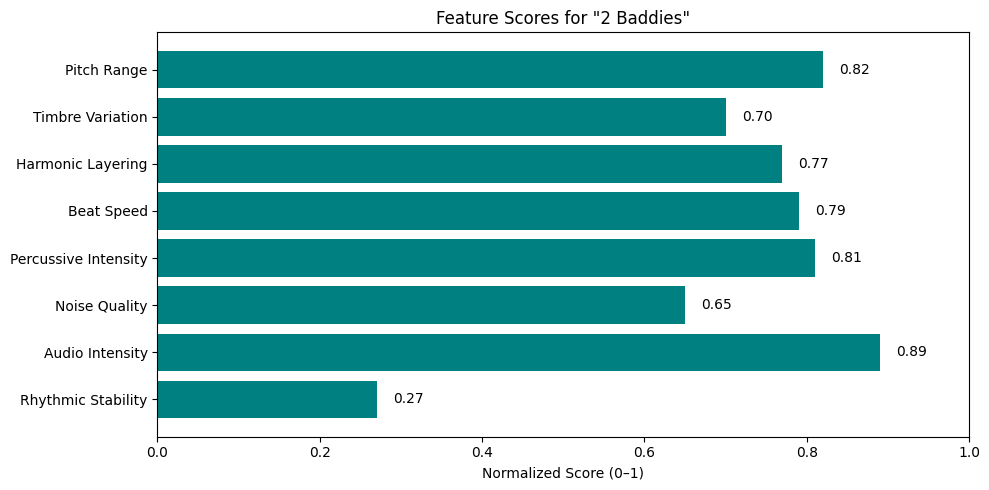

In [ ]:
import matplotlib.pyplot as plt

def plot_bar(song_title):
    row = score_table[score_table['track'].str.lower() == song_title.lower()]

    if row.empty:
        print(f"⚠️ Song '{song_title}' not found.")
        return

    features = [col for col in score_table.columns if col.endswith('_score') and col != 'track']
    values = row[features].values.flatten().tolist()
    labels = [f.replace('_score', '').replace('_', ' ').title() for f in features]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(labels, values, color='teal')
    plt.xlim(0, 1)
    plt.xlabel('Normalized Score (0–1)')
    plt.title(f'Feature Scores for "{song_title}"')
    plt.gca().invert_yaxis()
    for bar in bars:
        plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')
    plt.tight_layout()
    plt.show()

# Example: Bar chart for one track
plot_bar("2 Baddies")


In [ ]:
df_norm['difficulty_index'] = (df_norm['complexity_score'] + df_norm['hardness_score']) / 2


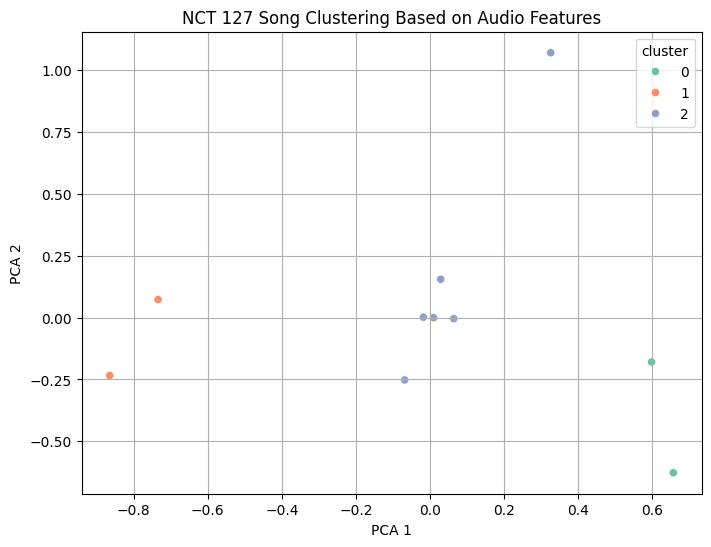

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
features_for_clustering = imputer.fit_transform(features_for_clustering)
# Optional: reduce dimension with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(features_for_clustering)

# Clustering
from sklearn.cluster import KMeans # Importing KMeans
kmeans = KMeans(n_clusters=3)
df_norm['cluster'] = kmeans.fit_predict(pca_data)

# Visualize clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df_norm['cluster'], palette='Set2')
plt.title('NCT 127 Song Clustering Based on Audio Features')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

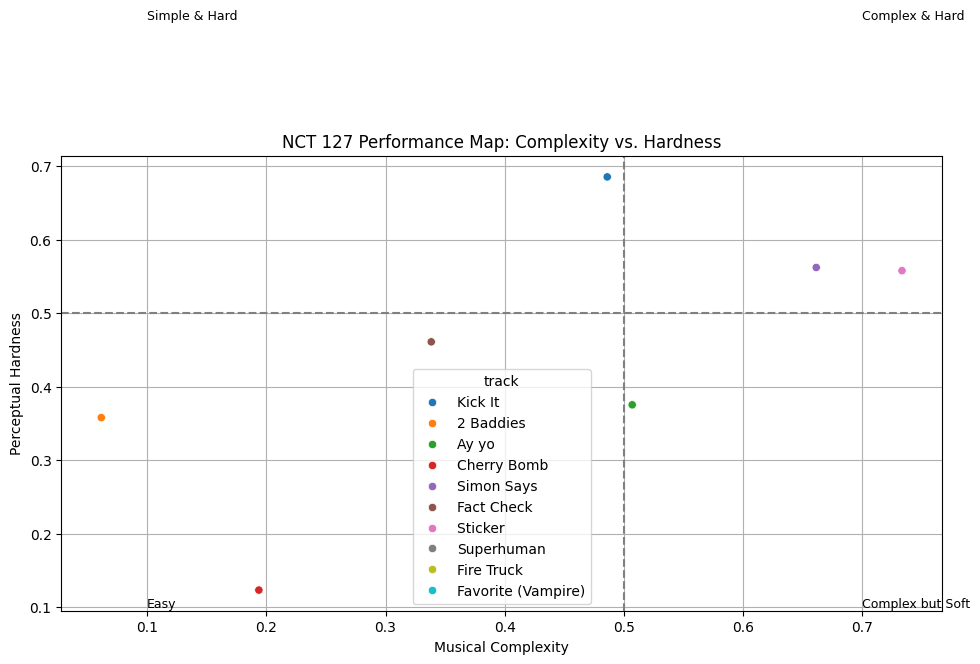

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_norm, x='complexity_score', y='hardness_score', hue='track') # Changed hue to 'track'
plt.title('NCT 127 Performance Map: Complexity vs. Hardness')
plt.xlabel('Musical Complexity')
plt.ylabel('Perceptual Hardness')
plt.axhline(0.5, linestyle='--', color='gray')
plt.axvline(0.5, linestyle='--', color='gray')
plt.text(0.1, 0.9, 'Simple & Hard', fontsize=9)
plt.text(0.1, 0.1, 'Easy', fontsize=9)
plt.text(0.7, 0.9, 'Complex & Hard', fontsize=9)
plt.text(0.7, 0.1, 'Complex but Soft', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 1: Upload the CSV
from google.colab import files
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import ast  # Import ast to handle string representations of lists

# Upload your combined dataset
print("📂 Please upload your combined Librosa + Spotify CSV file")
uploaded = files.upload()

# Load the file
df = pd.read_csv(list(uploaded.keys())[0]) # Get the actual filename from the uploaded dictionary
print("✅ File loaded successfully!")
display(df.head())

# STEP 2: Normalize selected features
features_to_normalize = [
    'pitch_range',
    'mfcc_var',
    'spectral_contrast_mean',
    'tempo',
    'onset_strength_mean',
    'spectral_flatness_mean',
    'energy'  # from Spotify metadata
]

# Convert string representations of lists to numeric values
for feature in features_to_normalize:
    # Check if the column contains string representations of lists
    if df[feature].dtype == 'object' and df[feature].str.startswith('[').any():
        df[feature] = df[feature].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith('[') else x)
        # Convert the column to numeric type
        df[feature] = pd.to_numeric(df[feature], errors='coerce')  # 'coerce' to handle potential errors gracefully

# Create new columns with _norm suffix
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[[f + '_norm' for f in features_to_normalize]] = scaler.fit_transform(df[features_to_normalize])

# STEP 3: Score each song
df_norm['complexity_score'] = df_norm[[
    'pitch_range_norm',
    'mfcc_var_norm',
    'spectral_contrast_mean_norm'
]].mean(axis=1)

df_norm['hardness_score'] = df_norm[[
    'tempo_norm',
    'onset_strength_mean_norm',
    'spectral_flatness_mean_norm',
    'energy_norm'
]].mean(axis=1)

# ... (rest of your code)

# Top 5 overall most difficult
df_norm[['track', 'difficulty_index']].sort_values(by='difficulty_index', ascending=False).head()

# Bottom 5 (easiest)
df_norm[['track', 'difficulty_index']].sort_values(by='difficulty_index', ascending=True).head()

📂 Please upload your combined Librosa + Spotify CSV file


Saving nct127_combined_features - nct127_all_features_combined.csv to nct127_combined_features - nct127_all_features_combined.csv
✅ File loaded successfully!


,track,tempo,mfcc_var,spectral_centroid_mean,spectral_flatness_mean,spectral_contrast_mean,onset_strength_mean,pitch_range,tempo.1,energy,danceability,valence,loudness,duration_ms
0,Kick It,[161.49902344],716.99350,2655.461646,0.035007,21.896637,1.632117,3854.4233,147.95,0.92,0.78,0.53,-3.8,198000
1,2 Baddies,[86.1328125],792.49490,2625.322497,0.034905,20.793282,1.540898,3854.0645,131.01,0.90,0.76,0.50,-4.1,215000
2,Ay yo,[89.10290948],998.89026,2489.159389,0.027172,21.705157,1.593173,3854.3997,130.60,0.91,0.75,0.50,-3.9,208000
3,Cherry Bomb,[78.30255682],997.36536,2425.999257,0.021735,21.715575,1.621376,3854.0103,122.00,0.82,0.67,0.32,-5.6,241000
4,Simon Says,[151.99908088],2130.45780,2378.761073,0.063908,21.688688,1.417547,3854.2632,135.00,0.86,0.65,0.40,-4.3,203000


KeyError: "['difficulty_index'] not in index"

In [ ]:
# ... (other code for normalization, complexity_score, hardness_score)

# Calculate the 'difficulty_index' column
df_norm['difficulty_index'] = (df_norm['complexity_score'] + df_norm['hardness_score']) / 2

# Now access it for sorting and display
df_norm[['track', 'difficulty_index']].sort_values(by='difficulty_index', ascending=False).head()
df_norm[['track', 'difficulty_index']].sort_values(by='difficulty_index', ascending=True).head()

,track,difficulty_index
3,Cherry Bomb,0.158470
1,2 Baddies,0.209761
5,Fact Check,0.399732
2,Ay yo,0.441163
0,Kick It,0.585826


from matplotlib import pyplot as plt
_df_0['difficulty_index'].plot(kind='hist', bins=20, title='difficulty_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('track').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['difficulty_index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'difficulty_index'}, axis=1)
              .sort_values('difficulty_index', ascending=True))
  xs = counted['difficulty_index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('difficulty_index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('track')):
  _plot_series(series, series_name, i)
  fig.legend(title='track', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('difficulty_index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['difficulty_index'].plot(kind='line', figsize=(8, 4), title='difficulty_index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['track'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='difficulty_index', y='track', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['difficulty_index'].plot(kind='hist', bins=20, title='difficulty_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('track').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='difficulty_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['difficulty_index']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('difficulty_index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('track')):
  _plot_series(series, series_name, i)
  fig.legend(title='track', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('difficulty_index')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['difficulty_index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'difficulty_index'}, axis=1)
              .sort_values('difficulty_index', ascending=True))
  xs = counted['difficulty_index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('difficulty_index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('track')):
  _plot_series(series, series_name, i)
  fig.legend(title='track', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('difficulty_index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['difficulty_index'].plot(kind='line', figsize=(8, 4), title='difficulty_index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['track'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='track', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['track'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='difficulty_index', y='track', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)